# Machine Learning Engineer Nanodegree
## Capstone Project Code
## Project 5: Facial Keypoints Detection

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [43]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Facial Keypoints Detection datasets
training_data = pd.read_csv('Data/training.csv')
test_data = pd.read_csv('Data/test.csv')

feature = training_data['Image']
keypoints = training_data.drop('Image', axis = 1)

# Take out ImageId in test_data as its mainly for Kaggle competition and is for referencing blank boxes to fill in with locations
test_data = test_data.drop('ImageId', axis = 1)


# Success
print "Facial Keypoints Detection training dataset has {} rows of data with {} variables each.".format(*training_data.shape)
print "Facial Keypoints Detection test dataset has {} rows of data with {} variables each.".format(*test_data.shape)

Facial Keypoints Detection training dataset has 7049 rows of data with 31 variables each.
Facial Keypoints Detection test dataset has 1783 rows of data with 1 variables each.


## Data Exploration

The details of the dataset to be used in this model were taken from Kaggle’s Facial Keypoints Detection competition [2]. The 15 keypoints, to be expected as outputs, being considered that represent elements in the face where left and right refer to the point of view of the subject are:

left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip.

Each data point for these elements is specified by an (x,y) real-valued pair in the space of pixel indices. Data points that are missing are left blank. The input image is displayed in the last field of the datasets consisting of a list of pixels (ordered by row), as integers between (0,255). This section will demonstrate minimum, maximum, mean, median, and standard deviation values for every keypoint's x and y pairs.



In [47]:
#Grab list of keypoint names
keypoint_names = list(keypoints)

# TODO: Find where NaN's exist, attempting to resolve the NaN's to use iPython Display as it would skew the data too much.
NaN_inds = pd.isnull(keypoints).any(1).nonzero()[0]
print "NaN count: {}\n".format(len(NaN_inds))

for name in keypoint_names:
    # TODO: Minimum price of the data
    minimum_pixel = np.amin(keypoints[name])

    # TODO: Maximum price of the data
    maximum_pixel = np.amax(keypoints[name])

    # TODO: Mean price of the data
    mean_pixel = np.mean(keypoints[name])

    # TODO: Median price of the data
    median_pixel = np.nanmedian(keypoints[name])

    # TODO: Standard deviation of prices of the data
    std_pixel = np.std(keypoints[name])
    
    # Show the calculated statistics
    print "Statistics for {}".format(name)
    print "Minimum pixels: {}".format(minimum_pixel)
    print "Maximum pixels: {}".format(maximum_pixel)
    print "Mean pixels: {}".format(mean_pixel)
    print "Median pixels: {}".format(median_pixel)
    print "Standard deviation of pixels: {}\n".format(std_pixel)


NaN count: 4909

Statistics for left_eye_center_x
Minimum pixels: 22.7633446452
Maximum pixels: 94.68928
Mean pixels: 66.3590212448
Median pixels: 66.4975659574
Standard deviation of pixels: 3.447988302

Statistics for left_eye_center_y
Minimum pixels: 1.616512
Maximum pixels: 80.5026490272
Mean pixels: 37.6512341919
Median pixels: 37.5280551724
Standard deviation of pixels: 3.15270181214

Statistics for right_eye_center_x
Minimum pixels: 0.686592
Maximum pixels: 85.0393813333
Mean pixels: 30.3061015141
Median pixels: 30.2513779589
Standard deviation of pixels: 3.08301091946

Statistics for right_eye_center_y
Minimum pixels: 4.091264
Maximum pixels: 81.2709105058
Mean pixels: 37.9769425717
Median pixels: 37.8132734545
Standard deviation of pixels: 3.0334055843

Statistics for left_eye_inner_corner_x
Minimum pixels: 19.0649535927
Maximum pixels: 84.4409912283
Mean pixels: 59.1593394374
Median pixels: 59.3046153846
Standard deviation of pixels: 2.6897614831

Statistics for left_eye_inner

## Exploratory Visualization

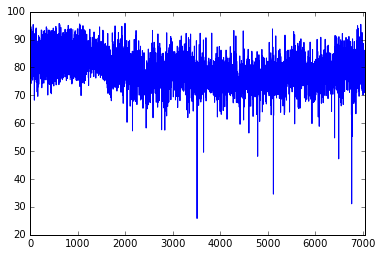

In [50]:
keypoints['mouth_center_bottom_lip_y'].plot()